In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import result
data = pd.read_csv('result.csv')

In [3]:
# Display the table
print("Model Ranking Table:")
print(data[['Model', 'BLEU', 'BERT', 'Rouge-1', 'Rouge-2', 'Rouge-L','Redundancy', 'TOPSIS Score', 'TOPSIS Rank']].sort_values(by='TOPSIS Rank'))


Model Ranking Table:
                              Model   BLEU   BERT  Rouge-1  Rouge-2  Rouge-L  \
2  philschmid/bart-large-cnn-samsum  0.172  0.921    0.532    0.292    0.449   
4        knkarthick/MEETING_SUMMARY  0.163  0.917    0.511    0.274    0.432   
0           facebook/bart-large-cnn  0.068  0.878    0.354    0.117    0.274   
3      google/pegasus-cnn_dailymail  0.051  0.860    0.319    0.095    0.254   
1     sshleifer/distilbart-cnn-12-6  0.049  0.865    0.311    0.100    0.244   

   Redundancy  TOPSIS Score  TOPSIS Rank  
2       0.559         0.561            1  
4       0.560         0.552            2  
0       0.537         0.445            3  
3       0.538         0.431            4  
1       0.540         0.430            5  


In [9]:
# Bar chart
labels = ['Bart-samsum', 'Meeting Summary','facebook/bart','pegasus', 'distilbart']
num_models = len(labels)

In [5]:
# Parameters for bar chart
rouge_score_1 = data['Rouge-1']
rouge_score_2 = data['Rouge-2']
rouge_score_L = data['Rouge-L']
BLEU = data['BLEU']
BERT = data['BERT']
redundancy = data['Redundancy']
topsis_score = data['TOPSIS Score']

In [6]:
# Normalize ranks to a scale of 0 to 1 for better comparison
normalized_ranks = data['TOPSIS Rank'] / np.max(data['TOPSIS Rank'])

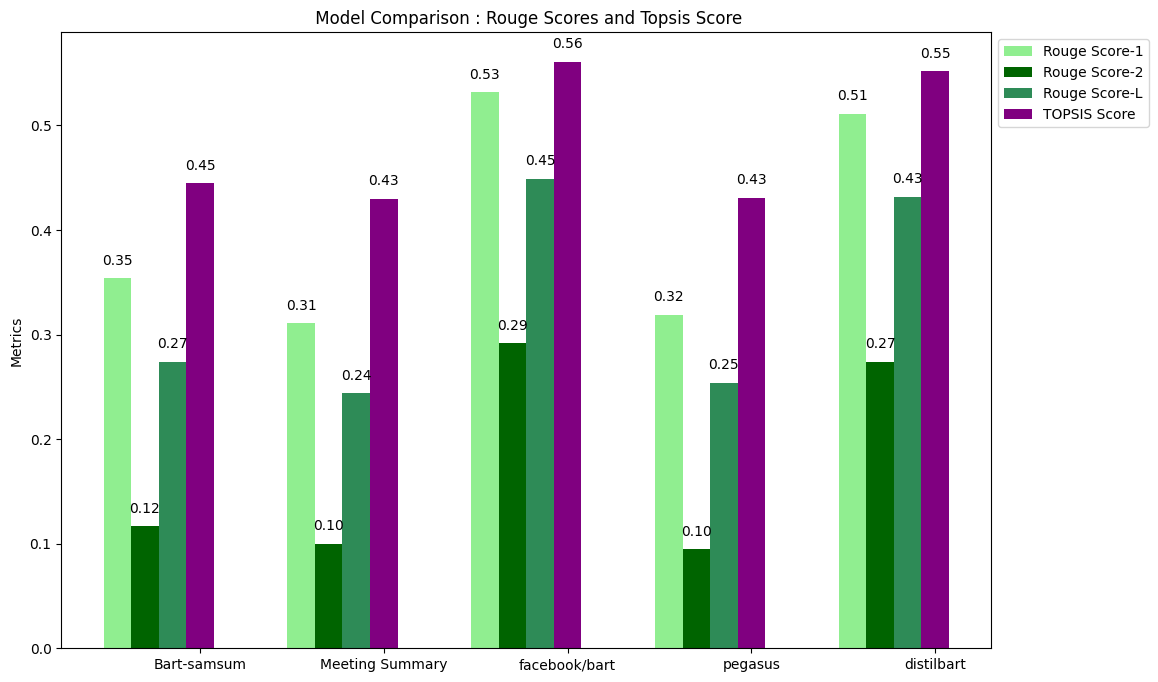

In [41]:
# Plot the bar chart with custom colors
fig, ax = plt.subplots(figsize=(12, 8))

bar_width = 0.15
index = np.arange(num_models)

# Set different colors for each metric
color_rouge_1 = 'lightgreen'
color_rouge_2 = 'darkgreen'
color_rouge_L = 'seagreen'
# color_bleu = 'red'
# color_bert = 'blue'
# color_rank = 'yellow'
# color_redundancy = 'orange'
color_score = 'purple'

ax.bar(index - 2 * bar_width, rouge_score_1, width=bar_width, label='Rouge Score-1', color=color_rouge_1)
ax.bar(index - bar_width, rouge_score_2, width=bar_width, label='Rouge Score-2', color=color_rouge_2)
ax.bar(index, rouge_score_L, width=bar_width, label='Rouge Score-L', color=color_rouge_L)
# ax.bar(index + bar_width, BLEU, width=bar_width, label='BLEU Score', color=color_bleu)
# ax.bar(index + 2 * bar_width, BERT, width=bar_width, label='BERT Score', color=color_bert)
# ax.bar(index + 3 * bar_width, redundancy, width=bar_width, label='Redundancy', color=color_redundancy)
# ax.bar(index + 4 * bar_width, normalized_ranks, width=bar_width, label='Normalized Rank', color=color_rank, alpha=0.5)
ax.bar(index + bar_width, topsis_score, width=bar_width, label='TOPSIS Score', color=color_score)

# Display values on top of each bar
for i, value in enumerate(rouge_score_1):
    ax.text(index[i] - 2 * bar_width, value + 0.01, f'{value:.2f}', ha='center', va='bottom')

for i, value in enumerate(rouge_score_2):
    ax.text(index[i] - bar_width, value + 0.01, f'{value:.2f}', ha='center', va='bottom')

for i, value in enumerate(rouge_score_L):
    ax.text(index[i], value + 0.01, f'{value:.2f}', ha='center', va='bottom')

for i, value in enumerate(topsis_score):
    ax.text(index[i] + bar_width, value + 0.01, f'{value:.2f}', ha='center', va='bottom')

ax.set_xticks(index + bar_width)
ax.set_xticklabels(labels)
ax.set_ylabel('Metrics')
ax.set_title(' Model Comparison : Rouge Scores and Topsis Score')


# Bring the legend outside and adjust its position
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Save the figure before showing it
plt.savefig('barchart_1.png', bbox_inches='tight')
plt.show()

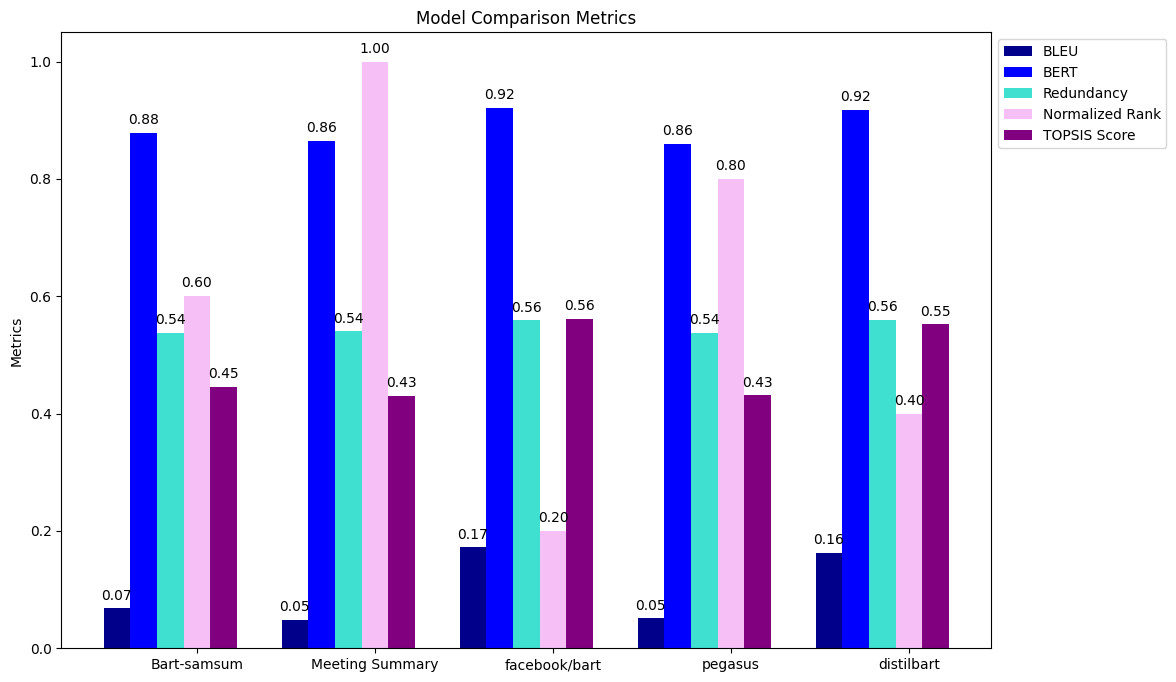

In [45]:
# Plot the bar chart with custom colors
fig, ax = plt.subplots(figsize=(12, 8))

bar_width = 0.15
index = np.arange(num_models)

# Set different colors for each metric

color_bleu = 'darkblue'
color_bert = 'blue'
color_rank = 'violet'
color_redundancy = 'turquoise'
color_score = 'purple'

# ax.bar(index - 2 * bar_width, rouge_score_1, width=bar_width, label='Rouge Score-1', color=color_rouge_1)
# ax.bar(index - bar_width, rouge_score_2, width=bar_width, label='Rouge Score-2', color=color_rouge_2)
# ax.bar(index, rouge_score_L, width=bar_width, label='Rouge Score-L', color=color_rouge_L)
ax.bar(index - 2 * bar_width, BLEU, width=bar_width, label='BLEU', color=color_bleu)
ax.bar(index - bar_width, BERT, width=bar_width, label='BERT', color=color_bert)
ax.bar(index, redundancy, width=bar_width, label='Redundancy', color=color_redundancy)
ax.bar(index + bar_width, normalized_ranks, width=bar_width, label='Normalized Rank', color=color_rank, alpha=0.5)
ax.bar(index + 2 * bar_width, topsis_score, width=bar_width, label='TOPSIS Score', color=color_score)



for i, value in enumerate(BLEU):
    ax.text(index[i] - 2* bar_width, value + 0.01, f'{value:.2f}', ha='center', va='bottom')

for i, value in enumerate(BERT):
    ax.text(index[i] - bar_width, value + 0.01, f'{value:.2f}', ha='center', va='bottom')

for i, value in enumerate(redundancy):
    ax.text(index[i], value + 0.01, f'{value:.2f}', ha='center', va='bottom')

for i, value in enumerate(normalized_ranks):
    ax.text(index[i] + bar_width, value + 0.01, f'{value:.2f}', ha='center', va='bottom')

for i, value in enumerate(topsis_score):
    ax.text(index[i] + 2 * bar_width, value + 0.01, f'{value:.2f}', ha='center', va='bottom')

ax.set_xticks(index + bar_width)
ax.set_xticklabels(labels)
ax.set_ylabel('Metrics')
ax.set_title('Model Comparison Metrics')

# Bring the legend outside and adjust its position
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Save the figure before showing it
plt.savefig('barchart_2.png', bbox_inches='tight')
plt.show()
